In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from os.path import isfile
from sortedcontainers import SortedSet
from queue import PriorityQueue

# Tworzenie zbiorów odcinków

<h2>Funkcje do obsługi zbiorów odcinków</h2>

In [3]:
# Generates random set of line segments with unique x coordinates
def generateRandomLineSegments(amount, minX, maxX, minY, maxY):
    lineSegments = []
    usedXs = set()
    for _ in range(amount):
        x1 = np.random.uniform(minX, maxX)
        # Check if x1 is already used
        while x1 in usedXs:
            x1 = np.random.uniform(minX, maxX)
        usedXs.add(x1)
        x2 = np.random.uniform(minX, maxX)
        # Check if x2 is already used
        while x2 in usedXs:
            x2 = np.random.uniform(minX, maxX)
        usedXs.add(x2)
        # Sort line segment points by x coordinate
        if x2 < x1:
            x1, x2 = x2, x1
        lineSegments.append(((x1,np.random.uniform(minY,maxY)),(x2,np.random.uniform(minY,maxY))))
    return lineSegments

# Generate set of line segments with a mouse
def mouseGenerateLineSegments():
    # Setup plot
    lineSegments = []
    usedXs = set()
    firstPoint = None
    firstPointPlot = None
    plt.close("all")
    fig, ax = plt.subplots()
    baseTitle = "LMB - dodaj punkt (2 dodane punkty tworzą odcinek), RMB - zakończ"
    ax.set_title(baseTitle)
    connectionId = None

    # Add point to canvas
    def addPoint(point):
        return ax.scatter(point[0], point[1], color="blue")

    # Add lineSegment to canvas
    def addLineSegment(point1, point2):
        xs = [point1[0], point2[0]]
        ys = [point1[1], point2[1]]
        ax.plot(xs, ys, color="blue")
    
    # Mouse click event handler
    def onClick(event):
        ax.set_title(baseTitle)
        nonlocal firstPoint, firstPointPlot
        # LMB - add point
        if event.button == 1 and event.inaxes == ax:
            point = (event.xdata, event.ydata)
            if point[0] in usedXs:
                ax.set_title(baseTitle + "\nWspółrzędne x muszą być unikatowe")
                plt.draw()
                return
            usedXs.add(point[0])
            # Remember point if it's the first one of line segment
            if firstPoint is None:
                firstPoint = point
                firstPointPlot = addPoint(point)
                plt.draw()
            # Create line segment if it's the second point
            else:
                addPoint(point)
                addLineSegment(firstPoint, point)
                plt.draw()
                # Sort line segment points by x coordinate
                if point[0] < firstPoint[0]:
                    firstPoint, point = point, firstPoint
                lineSegments.append((firstPoint, point))
                firstPoint = None
        # RMB - end line segments creation
        elif event.button == 3:
            if len(lineSegments) < 2:
                ax.set_title(baseTitle + "\nDodaj co najmniej 2 odcinki")
                plt.draw()
                return
            # Remove alone point if exists
            if firstPoint is not None:
                firstPointPlot.remove()
            ax.set_title("Stworzono odcinki")
            plt.draw()
            # Sever the connection
            fig.canvas.mpl_disconnect(connectionId)

    # Connect plot to the event handler
    connectionId = fig.canvas.mpl_connect('button_press_event', onClick)
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.show()
    return lineSegments

# Save line segments set to file
# each file line contains a line segment - 4 coordinates (x1, y1, x2, y2) seperated with a space
def saveLineSegmentsToFile(lineSegments, path):
    file = open(path, "w")
    for ls in lineSegments:
        file.write(f"{ls[0][0]} {ls[0][1]} {ls[1][0]} {ls[1][1]}\n")
    file.close()

# Read line segments set from file
def readLineSegmentsFromFile(path):
    if not isfile(path):
        print(f"File {path} not found")
        return None
    file = open(path, "r")
    lineSegments = []
    for line in file:
        coords = [float(x) for x in line.split()]
        lineSegments.append(((coords[0], coords[1]), (coords[2], coords[3])))
    return lineSegments

# Draw line segments
def drawLineSegments(lineSegments):
    canvas = Visualizer()
    canvas.add_line_segment(lineSegments)
    canvas.show()

# Convert point to string
def pointToString(point, decimalPlaces=3):
    stringFormat = f"{{:.{decimalPlaces}f}}"
    return f"({stringFormat.format(point[0])},{stringFormat.format(point[1])})"

# Print line segments
def printLineSegments(lineSegments):
    n = len(lineSegments)
    print(f"Zbiór {n} odcinków:")
    for i, ls in enumerate(lineSegments):
        print(f"\t{i}: {pointToString(ls[0])} {pointToString(ls[1])}")

<h2>Generacja zbiorów odcinków</h2>

Zadanie zbioru odcinków za pomocą myszki:

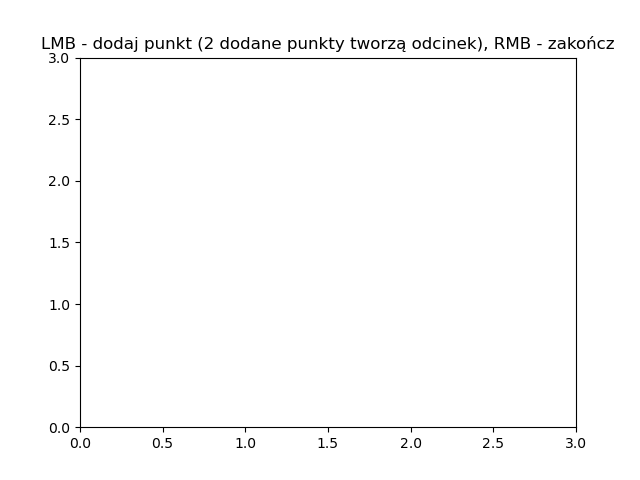

In [4]:
%matplotlib ipympl
mouseLineSegments = mouseGenerateLineSegments()

Generacja losowego zbioru odcinków:

In [5]:
randomLineSegments = generateRandomLineSegments(50, 0, 3, 0, 3)

<h2>Przedstawienie wygenerowanych zbiorów odcinków i zapis ich do pliku</h2>

Zbiór zadany myszką:

Zbiór 15 odcinków:
	0: (0.768,1.414) (1.300,0.529)
	1: (1.246,2.193) (2.244,1.439)
	2: (0.478,0.440) (0.980,1.041)
	3: (2.183,1.836) (2.214,2.413)
	4: (0.956,2.591) (1.458,2.591)
	5: (0.629,1.926) (0.865,1.625)
	6: (1.524,1.138) (2.075,0.822)
	7: (2.540,0.919) (2.619,1.585)
	8: (2.165,2.429) (2.450,2.137)
	9: (1.681,2.364) (1.833,2.461)
	10: (1.234,1.788) (1.476,2.137)
	11: (0.417,1.219) (0.944,1.406)
	12: (0.212,1.617) (0.454,2.258)
	13: (0.708,2.461) (1.482,2.250)
	14: (1.821,1.682) (2.081,1.016)


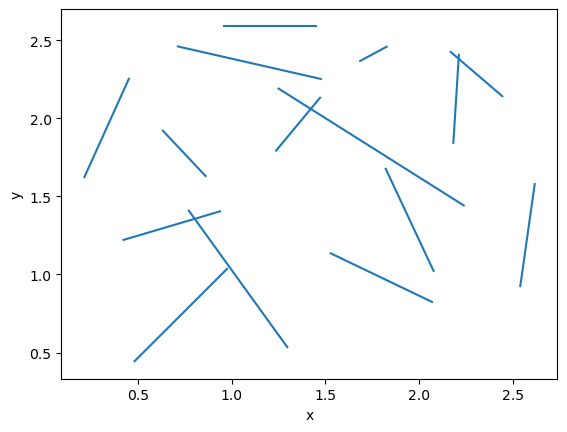

In [6]:
%matplotlib inline
saveLineSegmentsToFile(mouseLineSegments, "mouseLineSegments")
printLineSegments(mouseLineSegments)
drawLineSegments(mouseLineSegments)

Zbiór wygenerowany losowo:

Zbiór 50 odcinków:
	0: (1.906,2.743) (2.068,0.702)
	1: (0.358,2.672) (0.659,1.841)
	2: (1.750,2.632) (2.020,0.131)
	3: (1.189,1.485) (1.949,1.770)
	4: (1.246,1.747) (2.192,1.895)
	5: (1.517,1.754) (1.613,1.636)
	6: (0.006,2.622) (1.048,2.062)
	7: (0.735,0.205) (2.518,1.644)
	8: (1.880,1.566) (2.988,1.335)
	9: (1.851,2.829) (2.027,1.237)
	10: (0.746,0.942) (1.288,0.480)
	11: (1.006,0.334) (1.213,0.661)
	12: (2.201,2.535) (2.724,0.088)
	13: (1.152,1.635) (1.706,0.319)
	14: (0.204,1.698) (2.612,0.454)
	15: (0.472,0.594) (1.174,0.723)
	16: (0.532,0.209) (2.060,0.742)
	17: (0.749,1.133) (2.379,0.599)
	18: (0.922,0.827) (1.046,0.459)
	19: (0.466,0.000) (2.231,1.806)
	20: (0.609,2.813) (2.801,2.709)
	21: (0.601,0.509) (0.812,2.005)
	22: (0.569,2.833) (2.619,2.353)
	23: (2.119,1.163) (2.589,2.008)
	24: (0.899,0.057) (2.384,0.049)
	25: (0.934,1.796) (1.814,2.089)
	26: (1.816,0.075) (2.672,2.724)
	27: (0.050,0.408) (1.904,1.206)
	28: (0.775,0.326) (2.595,1.705)
	29: (1.680,1.444) (2.326,1.055)
	

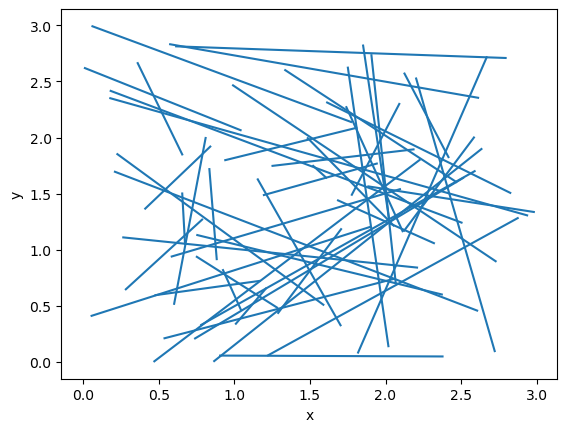

In [7]:
%matplotlib inline
saveLineSegmentsToFile(randomLineSegments, "randomLineSegments")
printLineSegments(randomLineSegments)
drawLineSegments(randomLineSegments)

# Sprawdzanie czy istnieje przecięcie w zbiorze odcinków

<h2>Funkcje sprawdzające istnienie przecięcia</h2>

In [40]:
# Event types
BEG = 0
END = 1
INTER = 2

# Point class
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def toTuple(self):
        return (self.x, self.y)

    @staticmethod
    def fromTuple(point):
        return Point(point[0], point[1])

# Class to be used in state structure
class LineSegment:
    def __init__(self, index, beg, end):
        self.index = index
        self.beg = beg
        self.end = end
        # Line (y = ax+b) that the line segment is a part of
        self.a = (beg.y - end.y) / (beg.x - end.x)
        self.b = beg.y - self.a * beg.x

    def toTuple(self):
        return (self.beg.toTuple(), self.end.toTuple())

    @staticmethod
    def updateBroomX(x):
        LineSegment.broomX = x

    # Overloaded operators to work properly with SortedSet
    def __eq__(self, other):
        return self.beg == other.beg and self.end == other.end

    def __lt__(self, other):
        return self.a * LineSegment.broomX + self.b < other.a * LineSegment.broomX + other.b

    def __hash__(self):
        return hash((self.beg, self.end))

# Event class
class Event:
    def __init__(self, eventType, point, lsIndices):
        self.eventType = eventType
        self.point = point
        self.lsIndices = lsIndices
    
    # Overloaded operators to work properly with PriorityQueue
    def __eq__(self, other):
        return self.point.x == other.point.x

    def __lt__(self, other):
        return self.point.x < other.point.x

# Get intersection point of two line segments
# returns None if they don't intersect
def intersectionPoint(ls1, ls2):
    # Return None if line segments have the same slope
    if ls1.a == ls2.a:
        return None

    intersectionX = (ls2.b - ls1.b) / (ls1.a - ls2.a)
    # Check if intersectionX is contained in both line segments
    if ls1.beg.x < intersectionX < ls1.end.x and ls2.beg.x < intersectionX < ls2.end.x:
        return Point(intersectionX, ls1.a * intersectionX + ls1.b)

    return None

# Check if lines intersect
def linesIntersect(ls1, ls2):
    if intersectionPoint(ls1, ls2) is None:
        return False
    return True

# Check if line segments of given indices in the state structure intersect
# also checks if given indices are in state structure
def checkIntersectionByIndices(state, index1, index2):
    stateLen = len(state)
    if 0 <= index1 < stateLen and 0 <= index2 < stateLen:
        return linesIntersect(state[index1], state[index2])
    return False

# Get intersection of line segments of given indices in the state structure
# also checks if given indices are in state structure
# returns None if intersection doesn't exist
def getIntersectionByIndices(state, index1, index2):
    stateLen = len(state)
    if 0 <= index1 < stateLen and 0 <= index2 < stateLen:
        return intersectionPoint(state[index1], state[index2])
    return None

# Check if intersection exists in a set of line segments
def existsIntersection(lineSegments):
    events = PriorityQueue()
    state = SortedSet()
    lineSegmentClasses = []

    for i, ls in enumerate(lineSegments):
        beg = Point.fromTuple(ls[0])
        end = Point.fromTuple(ls[1])
        lineSegmentClasses.append(LineSegment(i, beg, end))
        events.put((beg.x, Event(BEG, beg, [i])))
        events.put((end.x, Event(END, end, [i])))

    while not events.empty():
        x, event = events.get()
        LineSegment.updateBroomX(x)
        ls = lineSegmentClasses[event.lsIndices[0]]
        if event.eventType == BEG:
            state.add(ls)
            lsIndex = state.index(ls)
            if checkIntersectionByIndices(state, lsIndex, lsIndex - 1) or checkIntersectionByIndices(state, lsIndex, lsIndex + 1):
                return True
        elif event.eventType == END:
            lsIndex = state.index(ls)
            if checkIntersectionByIndices(state, lsIndex - 1, lsIndex + 1):
                return True
            state.pop(lsIndex)

    return False

# Draw broomintersectionPoint(state[index1], state[index2])
def drawBroom(canvas, x):
    return canvas.add_line(((x,0),(x,1)), color="red")

# Draw line segment depending on the state of it
BASE = "blue"
ADDED = "green"
COMPARING = "yellow"
REMOVED = "gray"
def drawLineSegment(canvas, ls, color):
    return canvas.add_line_segment(ls, color=color)

# Draw found intersectionPoint
def drawIntersectionPoint(canvas, point):
    canvas.add_point(point, color="purple")

# Try to find an intersection with drawing
def findIntersectionDraw(canvas, state, index1, index2):
    stateLen = len(state)
    if not (0 <= index1 < stateLen and 0 <= index2 < stateLen):
        return False
    ls1 = state[index1]
    ls2 = state[index2]
    lss = drawLineSegment(canvas, [ls1.toTuple(), ls2.toTuple()], COMPARING)
    intPoint = intersectionPoint(ls1, ls2)
    found = intPoint is not None
    if found:
        drawIntersectionPoint(canvas, intPoint.toTuple())
    canvas.remove_figure(lss)
    return found

# Check if intersection exists in a set of line segments while drawing the process
def existsIntersectionDraw(lineSegments):
    canvas = Visualizer()
    drawLineSegment(canvas, lineSegments, BASE)
    
    events = PriorityQueue()
    state = SortedSet()
    lineSegmentClasses = []

    for i, ls in enumerate(lineSegments):
        beg = Point.fromTuple(ls[0])
        end = Point.fromTuple(ls[1])
        lineSegmentClasses.append(LineSegment(i, beg, end))
        events.put((beg.x, Event(BEG, beg, [i])))
        events.put((end.x, Event(END, end, [i])))

    broom = None
    while not events.empty():
        x, event = events.get()
        LineSegment.updateBroomX(x)
        if broom is not None:
            canvas.remove_figure(broom)
        broom = drawBroom(canvas, x)
        ls = lineSegmentClasses[event.lsIndices[0]]
        if event.eventType == BEG:
            state.add(ls)
            drawLineSegment(canvas, ls.toTuple(), ADDED)
            lsIndex = state.index(ls)
            if findIntersectionDraw(canvas, state, lsIndex, lsIndex - 1):
                return True, canvas
            if findIntersectionDraw(canvas, state, lsIndex, lsIndex + 1):
                return True, canvas
        elif event.eventType == END:
            lsIndex = state.index(ls)
            if findIntersectionDraw(canvas, state, lsIndex - 1, lsIndex + 1):
                return True, canvas
            state.pop(lsIndex)
            drawLineSegment(canvas, ls.toTuple(), REMOVED)
            
    return False, canvas

<h2>Sprawdzenie czy wygenerowane zbiory mają parę przecinającyh się odcinków</h2>

Zbiór zadany myszką:

In [43]:
print(existsIntersection(mouseLineSegments))

True


Zbiór wygenerowany losowo:

In [44]:
print(existsIntersection(randomLineSegments))

True


<h2>Wizualizacja procesu szukania przecięcia</h2>

Zbiór zadany myszką:

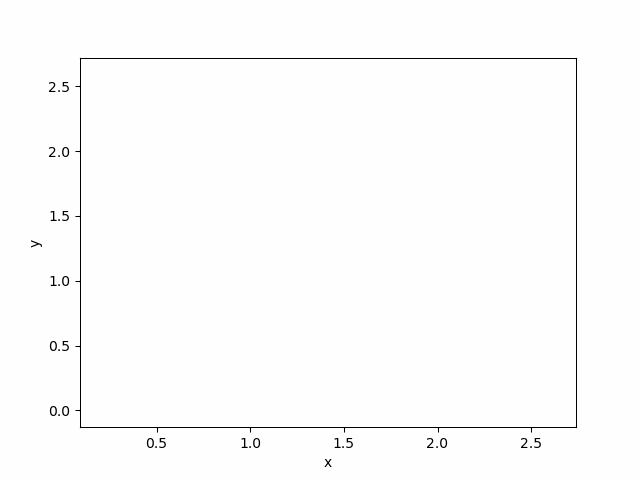

In [46]:
_, c = existsIntersectionDraw(mouseLineSegments)
c.show_gif()

Zbiór wygenerowany losowo:

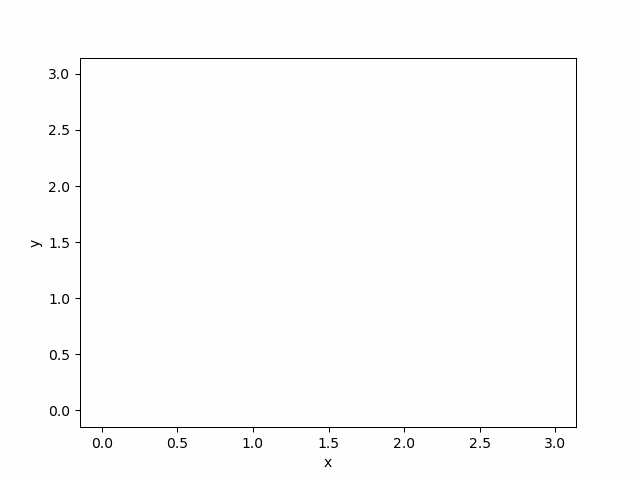

In [47]:
_, c = existsIntersectionDraw(randomLineSegments)
c.show_gif()

# Przydatne funkcje 

In [ ]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

In [ ]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

In [ ]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [ ]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(1, generate_uniform_sections)

<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [ ]:
# section = ...

Zwizualizuj otrzymane odcinki

In [ ]:
# visualize = ...

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [ ]:
# def add_sections(sections):

Uzupełnij funkcję ```is_intersection```

In [ ]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(2, is_intersection)

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.